In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv
from random import uniform

In [ ]:
def generate_points(n):
    x_coordinates=[]
    for i in range(n):
        x_coordinates.append(uniform(0.00, 1.00))
    return x_coordinates

In [ ]:
def gaussian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y

In [ ]:
def generate_points_with_noise(n):
    x_coordinates=[]
    for i in range(n):
        x_coordinates.append(uniform(0.00, 1.00))
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_noise=np.random.normal(0,0.01)
        y= math.sin(2*np.pi*x)+gaussian_noise
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

In [ ]:
def kernel_function(x_query,x_n,x,variance):
    sigma=math.sqrt(variance)
    s=0
    for i in range(len(x)):
        s = s + gaussian_function(x_query-x[i],0,sigma**2) 
    return ((gaussian_function(x_query-x_n,0,sigma**2)) / s)

def kernel_regression(x,t,x_query):
    s1=0
    s2=0
    for i in range(len(x)):
        s1 = s1 + kernel_function(x_query,x[i],x,0.01) * t[i]
        s2 = s2 + kernel_function(x_query,x[i],x,0.01) * (t[i] ** 2)    
    return s1,s2-(s1**2)

x_train,y_train=generate_points_with_noise(10)

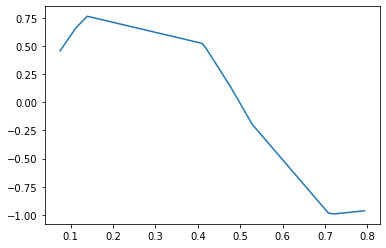

In [ ]:
sns.lineplot(x=x_train,y=y_train)

In [ ]:
x_test=generate_points(10)

y_predicted=[]
mu_list=[]
var_list=[]
for i in range(len(x_test)):
    mu,var = kernel_regression(x_train,y_train,x_test[i])
    y_predicted.append(mu)
    mu_list.append(mu)
    var_list.append(var)
y_predicted

[0.4905441051748333,
 0.6385390058170279,
 -0.33957952091656773,
 -0.7975280639930786,
 0.28546749293237844,
 0.23365303493441592,
 -0.9712166351959061,
 0.2975287815347568,
 -0.0108283918388414,
 -0.564747624641474]

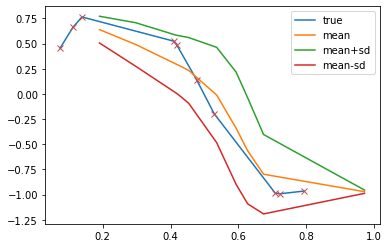

In [ ]:
x_train = np.array(x_train)
y_train=np.array(y_train)
mu_list = np.array(mu_list)
var_list = np.array(var_list)
sd_list = np.array([math.sqrt(i) for i in var_list])
up_limit=mu_list+sd_list
low_limit= mu_list-sd_list
sns.lineplot(x=x_train,y=y_train,label='true')
sns.lineplot(x=x_test,y=y_predicted,label='mean')
sns.lineplot(x=x_test,y=up_limit,label='mean+sd')
sns.lineplot(x=x_test,y=low_limit,label='mean-sd')
if x_train is not None:
        plt.plot(x_train, y_train, 'rx')
sns.set(style='dark',)